In [1]:
from train import *
from utils import *
from loss import *
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 1. Load content and style images

### 1.1 load and resize content image

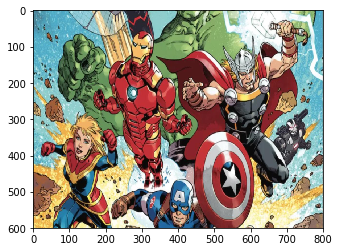

In [2]:
content_image = scipy.misc.imread("./images/content/avengers_slice_cover.jpg")
#image = scipy.misc.imresize(image, (image_height, image_width))
content_image = scipy.misc.imresize(content_image, (600, 800))
plt.imshow(content_image)


### 1.2 transfer content image to numpy arrays

In [3]:
content_image = content_image[np.newaxis, :, :, :]

### 1.3 load and resize style image

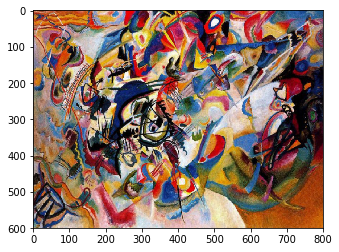

In [4]:
style_image = scipy.misc.imread("./images/style/Composition-VII.jpg")
#image = scipy.misc.imresize(image, (image_height, image_width))
style_image = scipy.misc.imresize(style_image, (600, 800))
plt.imshow(style_image)

### 1.4 transfer style image to numpy arrays

In [5]:
style_image = style_image[np.newaxis, :, :, :]

## 2. Load pre-trained VGG19

In [6]:
vgg_model = vgg19("imagenet-vgg-verydeep-19.mat")

In [21]:
# Initialize Tensorflow
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Calculate the content loss using 'conv4_2' as suggested in the paper
sess.run(vgg_model["input"].assign(content_image))
content_loss = cal_content_loss(sess.run(vgg_model["conv4_2"]), vgg_model["conv4_2"])

# Calculate style loss using the layers mentioned in the paper
style_loss = 0
layers = [("conv1_1", 1), ("conv2_1", 2), ("conv3_1", 3), ("conv4_1", 4), ("conv5_1", 5)]
sess.run(vgg_model["input"].assign(style_image))

for layer in layers:
    E = cal_style_loss(sess.run(vgg_model[layer[0]]), vgg_model[layer[0]])
    W = layer[1]

    # Equation 5 of the paper
    style_loss = style_loss + E * W

# Get the content and style weight factors
alpha = 1
beta = 1000

# Equation 7 of the paper
total_loss = (alpha * content_loss) + (beta * style_loss)

# Set the number of iterations
iterations = 200

# Train the network using L-BFGS optimizer
train_step = tf.contrib.opt.ScipyOptimizerInterface(
        total_loss,
        method="L-BFGS-B",
        options={"maxiter": iterations,
                 "disp": 100})

sess.run(tf.global_variables_initializer())
sess.run(vgg_model["input"].assign(content_image))
train_step.minimize(sess,loss_callback=True)

# output directory
output_directory = "./images/result"
# Save the final image
output_image = sess.run(vgg_model["input"])

filename = output_directory + "/avengers_slice_cover_Composition-VII_200.jpg"
save_image(filename, output_image)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 21656131344531456.000000
  Number of iterations: 200
  Number of functions evaluations: 217


TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles.For reference, the tensor object was Tensor("loss_1:0", shape=(), dtype=string) which was passed to the feed with key Tensor("loss_1:0", shape=(), dtype=string).

In [23]:
total_loss

<tf.Tensor 'add_45:0' shape=() dtype=float32>

## 3. show style-transfered image

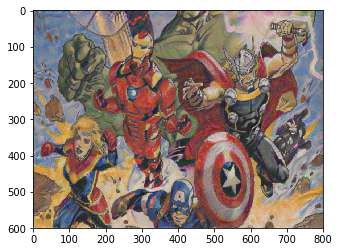

In [10]:
transfered_image = scipy.misc.imread("./images/result/avengers_slice_cover_Composition-VII_200.jpg")
#image = scipy.misc.imresize(image, (image_height, image_width))
transfered_image = scipy.misc.imresize(transfered_image, (600, 800))
plt.imshow(transfered_image)
